# Phys 512: Homework 1

## 2. Interpolation and thermodynamics

Density: $\rho = [10^{-6},1]$ Kg$\cdot$m$^{-3}$ but also $\rho = 28m_un$

Temperature: $[100,1000]$ K.

Mass: $m = 28m_u$

Whatever: $n_Q = (mk_BT/2\pi\hbar^2)^{3/2}$

uma: $m_n = 1.66053886\cdot10^{(-27)}$ kg.

# a)


These are the equations we want to interpolate:

Pressure: $P=nk_BT$

Entropy: $S=k_B\left(\frac{5}{2}-ln\left(\frac{n}{n_Q}\right)\right)$

In our pursuit of computing logarithmic pressure values, we can represent this analytically as: 

$$log_{10}(P) = log_{10}(k_B)-log_{10}(m)+log_{10}(\rho)+log_{10}(T)$$

This formulation draws attention to a problem that arises when $\log_{10}(P)$ approaches zero. This occurs when $\log_{10}(k_B) + \log_{10}(\rho) + \log_{10}(T) \approx \log_{10}(m)$. In such situations, our interpolation method exhibits important inaccuracies, resulting in evenly spaced data points with high errors. This line represents where the previously mentioned equality is approximately satisfied. To address this issue, we can eliminate the dependency on $\log_{10}(m).$ If we do that we will see how the line disapears and the result is a fuzzy Roundouff error background.

Also we can redifine the Entropy to get this linear sums:

$$S = \frac{5}{2}-\ln{(\rho)}+\ln{(m)}+\frac{3}{2}\left( \ln{(m)}+\ln{(k_B)} +\ln{(T)}-\ln{\left( 2\pi \hbar^2 \right) } \right)$$ 

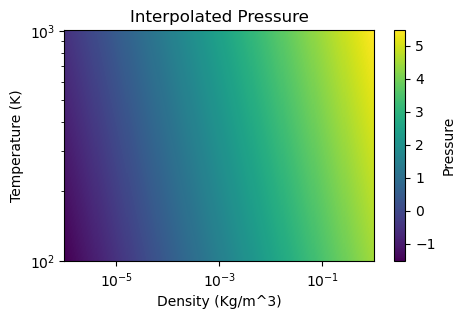

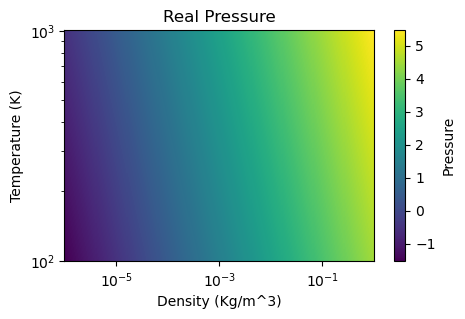

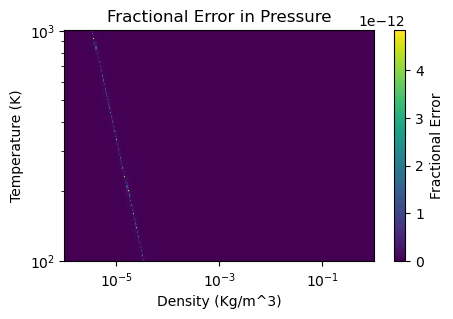

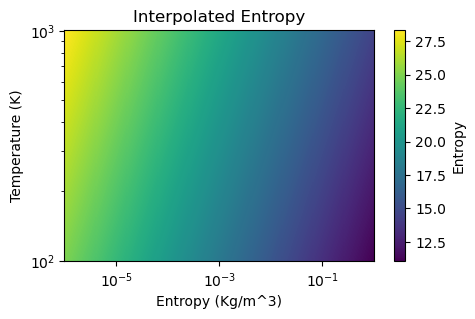

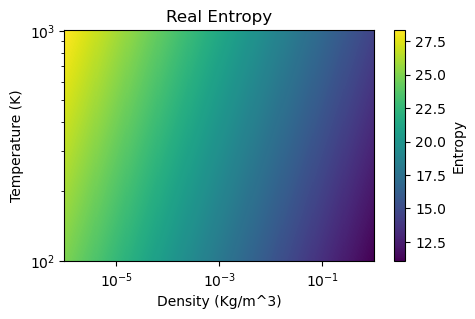

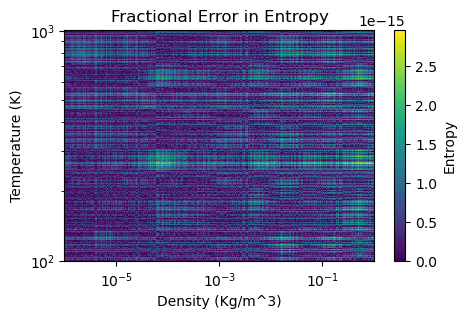

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

#We define all of our variables
num_points = 15
h = 6.62607015*10**(-34)
k_B = 1.380649*10**(-23)
m_u = 1.66053886*10**(-27)
m = 28*m_u #we will just use this values from now on

#We choose the sample points with which we are going to do the interpolation and also the total number of points we will plot 
#our interpolated function
temp_coarse = 10**np.linspace(2, 3, num_points)
density_coarse  = 10**np.linspace(-6, 0, num_points)
temp_expanded = 10**np.linspace(2, 3, 20*num_points)
density_expanded  = 10**np.linspace(-6, 0, 20*num_points)


# functions to interpolate
def funclogpressure(logrho,logT):
    logP = np.log10(k_B)+logT+logrho-np.log10(m)
    return logP

def funcentropy(logrho,logT):
    S = (5/2)-logrho+np.log(m)+(3/2)*(np.log(m)+np.log(k_B)+logT-np.log(2*np.pi*h**2))
    return S

#Creating arrays with the function values, in case we want to plot them after
pressure_coarse = np.zeros((len(temp_coarse),len(density_coarse)))
entropy_coarse = np.zeros((len(temp_coarse),len(density_coarse)))

pressure_expanded = np.zeros((len(temp_expanded),len(density_expanded)))
entropy_expanded = np.zeros((len(temp_expanded),len(density_expanded)))

for i, T in enumerate(temp_coarse):
    for j, rho in enumerate(density_coarse):
        pressure_coarse[i][j] = funclogpressure(np.log10(rho),np.log10(T))
        entropy_coarse[i][j] = funcentropy(np.log(rho),np.log(T))

for i, T in enumerate(temp_expanded):
    for j, rho in enumerate(density_expanded):
        pressure_expanded[i][j] = funclogpressure(np.log10(rho),np.log10(T))
        entropy_expanded[i][j] = funcentropy(np.log(rho),np.log(T))

#Now we interpolate the functions with the logarithmic values of our variables
interp_function_pressure = scipy.interpolate.RectBivariateSpline(np.log10(density_coarse), np.log10(temp_coarse), pressure_coarse)
interp_function_entropy = scipy.interpolate.RectBivariateSpline(np.log(density_coarse), np.log(temp_coarse), entropy_coarse)

rho_mesh, T_mesh = np.meshgrid(density_expanded, temp_expanded)

#We plot the original function and the interpolated one just to see that they are, in general, very similar.

plt.figure(figsize=(5, 3))
plt.pcolormesh(rho_mesh, T_mesh, interp_function_pressure(np.log10(density_expanded),np.log10(temp_expanded)), shading='auto', cmap='viridis')
plt.colorbar(label='Pressure')
plt.xlabel('Density (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Interpolated Pressure')
plt.xscale('log')
plt.yscale('log')


plt.figure(figsize=(5, 3))
plt.pcolormesh(rho_mesh, T_mesh, pressure_expanded, shading='auto', cmap='viridis')
plt.colorbar(label='Pressure')
plt.xlabel('Density (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Real Pressure')
plt.xscale('log')
plt.yscale('log')

#Finally we plot the error, which is simply the difference between the real function and the interpolated, divided by the real one


plt.figure(figsize=(5, 3))
plt.pcolormesh(rho_mesh, T_mesh, (abs((interp_function_pressure(np.log10(density_expanded),np.log10(temp_expanded))-pressure_expanded)/pressure_expanded)) , shading='auto', cmap='viridis')
plt.colorbar(label='Fractional Error')
plt.xlabel('Density (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Fractional Error in Pressure')
plt.xscale('log')
plt.yscale('log')

#We repeat for entropy
                                                                 
plt.figure(figsize=(5, 3))
plt.pcolormesh(rho_mesh, T_mesh, interp_function_entropy(np.log(density_expanded), np.log(temp_expanded)), shading='auto', cmap='viridis')
plt.colorbar(label='Entropy')
plt.xlabel('Entropy (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Interpolated Entropy')
plt.xscale('log')
plt.yscale('log')

plt.figure(figsize=(5, 3))
plt.pcolormesh(rho_mesh, T_mesh, entropy_expanded, shading='auto', cmap='viridis')
plt.colorbar(label='Entropy')
plt.xlabel('Density (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Real Entropy')
plt.xscale('log')
plt.yscale('log')

plt.figure(figsize=(5, 3))
plt.pcolormesh(rho_mesh, T_mesh, (abs((interp_function_entropy(np.log(density_expanded),np.log(temp_expanded))-entropy_expanded)/entropy_expanded)) , shading='auto', cmap='viridis')
plt.colorbar(label='Entropy')
plt.xlabel('Density (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Fractional Error in Entropy')
plt.xscale('log')
plt.yscale('log')
plt.show()

We can observe in the preceding plots how the error for the interpolation approaches nearly machine precision. This phenomenon arises because we are effectively interpolating linear functions, given that we employ logarithmic values for our variables. This results in a better approximation and, consequently, a reduced error.

It is noteworthy that the pressure error plot reveals an interesting pattern of dots with higher error levels. These points merely duplicate the background error, an acceptable value. They are associated with conditions where $log_{10}(P)$ is nearly zero.

# b)

Helmholz energy: $F = E-TS$ where $E = (3/2)k_BT$

Pressure: $P = \left.n^2\frac{\partial F}{\partial n}\right|_{T}$

Entropy: $S = \left.-\frac{\partial F}{\partial T}\right|_{n}$

This implies that: $\left.\frac{\partial S}{\partial n}\right|_{T} = \left.\frac{1}{n^2}\frac{\partial P}{\partial T}\right|_{n}$

But form this expressions, we have to do some algebra to achive an equality we can actually use. Since we have made the interpolation with the logarithmic values for $T$ and $\rho$, we will rewrite the previous identidy with this variables. So

$$-\frac{\partial S}{\partial n} = -\frac{\partial S}{\partial \rho}\frac{\partial \rho}{\partial n} = -28 m_u\frac{\partial S}{\partial \rho}=-m\frac{\partial S}{\partial \rho} = -m\frac{1}{\rho}\frac{\partial S}{\partial \ln{\rho}}$$

and

$$\frac{\partial P }{\partial T} = \frac{1}{T\ln{(10)}}\frac{\partial P }{\partial (log_{10}T)}$$

Therefore:

$$-T\ln{(10)}\frac{\rho}{m}\frac{\partial S}{\partial \ln{\rho}} = \frac{\partial P }{\partial (log_{10}T)} \rightarrow 0=T\ln{(10)}\frac{\rho}{m}\frac{\partial S}{\partial \ln{\rho}}+ \frac{\partial P }{\partial (log_{10}T)}$$

We should remember that we computed $\frac{S}{k_B}$, so that's what we are going to use here:

$$\frac{P\ln{(10)}}{k_B}k_B\frac{\partial S/k_B}{\partial \ln{\rho}}+ \frac{\partial P }{\partial (log_{10}T)} = P\ln{(10)}\frac{\partial S/k_B}{\partial \ln{\rho}}+ \frac{\partial P }{\partial (log_{10}T)}$$

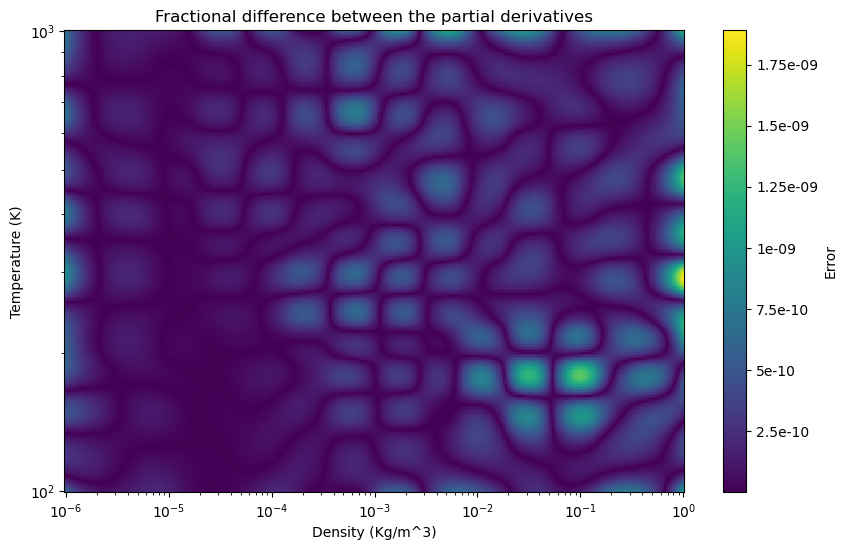

In [155]:
#We calculate the derivatives witht the partial_derivative function

derivative_pressure_log10T = interp_function_pressure.partial_derivative(1,1)
derivative_entropy_lnrho = interp_function_entropy.partial_derivative(1,1)

#From the expression deduced before we can see that every value diferent from 0 must be the error
error = abs(np.log(10)*interp_function_pressure(np.log10(density_expanded),np.log10(temp_expanded))*derivative_entropy_lnrho(np.log(density_expanded),np.log(temp_expanded))+derivative_pressure_log10T(np.log10(density_expanded),np.log10(temp_expanded)))

#This is just to see more easely the scale of the error 
import matplotlib
func = lambda x,pos: "{:g}".format(x*1000)
fmt = matplotlib.ticker.FuncFormatter(func)

#Finaly we plot the error
plt.figure(figsize=(10, 6))
plt.pcolormesh(rho_mesh, T_mesh, error  , shading='auto', cmap='viridis')
plt.colorbar(label='Error', format = fmt)
plt.xlabel('Density (Kg/m^3)')
plt.ylabel('Temperature (K)')
plt.title('Fractional difference between the partial derivatives')
plt.xscale('log')
plt.yscale('log')
plt.show()

We can observe a similar pattern to what we observed in the error of the interpolation. In this case, the magnitude of the error is larger than before, primarily because we are compounding the errors from both the pressure and entropy interpolations. We can identify specific clusters of points corresponding to the samples we used.

For equations of state where it is impossible to express them as linear sums, I anticipate encountering a greater degree of error.